# CS 221 Project - Finding Classification Values
This notebook determines the classification ranges for different levels of virality.

## Libraries
Using `pandas` for data analysis.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Reading in Data
Looking at the data from the Kaggle dataset.

In [2]:
main_df = pd.read_csv('data/ted_main.csv')
transcript_df = pd.read_csv('data/transcripts.csv')

## Verifying Usage of URLs
Making sure all URLs would be used.

In [3]:
# Iterate through the main URLs and transcript URLs
main_urls = main_df['url']
transcript_urls = transcript_df['url']
common_urls = []

# Find URLs in common
for url in main_urls:
    for other_url in transcript_urls:
        if (url == other_url):
            common_urls.append(url)

## Creating Final Main Dataframe
Creating dataframe with main entries linked to their transcripts.

In [4]:
# Mapping common URLs to thing in index dataframe
main_df["transcript"] = ""
for i in range(len(common_urls)):
    transcript_entry = transcript_df[transcript_df['url'] == common_urls[i]]
    final_transcript = transcript_entry['transcript'].values[0]
    main_df.loc[main_df['url'] == common_urls[i], 'transcript'] = final_transcript

# Remove anything with no entries
main_df = main_df[main_df['transcript'] != ""]
main_df.to_csv('data/final_data.csv', index=False)

## Visualizing Distribution of Views
Looking at all possible TED Talks, and then going from there.

(array([ 9., 12., 17., 31., 36., 54., 39., 54., 53., 60., 65., 70., 89.,
        69., 77., 73., 82., 81., 90., 86., 81., 65., 80., 53., 41., 55.,
        57., 58., 48., 39., 48., 35., 28., 23., 31., 21., 18., 20., 18.,
        21., 17., 14., 20., 16., 12., 16.,  7.,  9., 15., 15.,  8., 14.,
        12.,  6.,  7.,  7.,  5.,  8.,  5.,  6.,  4.,  5.,  6.,  7.,  7.,
         5.,  3.,  5.,  4.,  5.,  3.,  3.,  3.,  2.,  7.,  4.,  3.,  4.,
         4.,  3.,  3.,  2.,  8.,  2.,  3.,  4.,  5.,  2.,  2.,  6.,  1.,
         1.,  2.,  5.,  5.,  4.,  1.,  2.,  5.,  1.,  4.,  3.,  2.,  1.,
         0.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
         1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  2.,
         1.,  0.,  1.,  0.,  4.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  1.,  2.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  2.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.

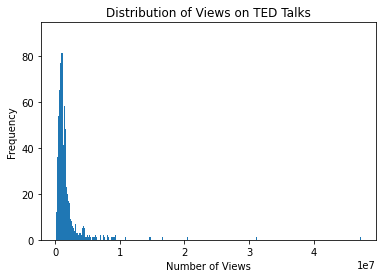

In [5]:
main_df = main_df.sort_values(by=['views'])
views = main_df['views']
plt.title("Distribution of Views on TED Talks")
plt.xlabel("Number of Views")
plt.ylabel("Frequency")
plt.hist(views, bins=1000)

## Splitting Up Data into $5$ Classes
Classifying the data into different levels of virality.

In [6]:
# Create nunber of classes, class size, and total classes
num_classes = 5
class_size = int(len(views) / num_classes)
classes = [[None]] * num_classes

# Creating the individual classes
total = 0
for i in range(num_classes):
    classes[i] = views[total:total + class_size]
    total = total + class_size

## Visualize Histograms of Each Class
Finish up looking at each class.

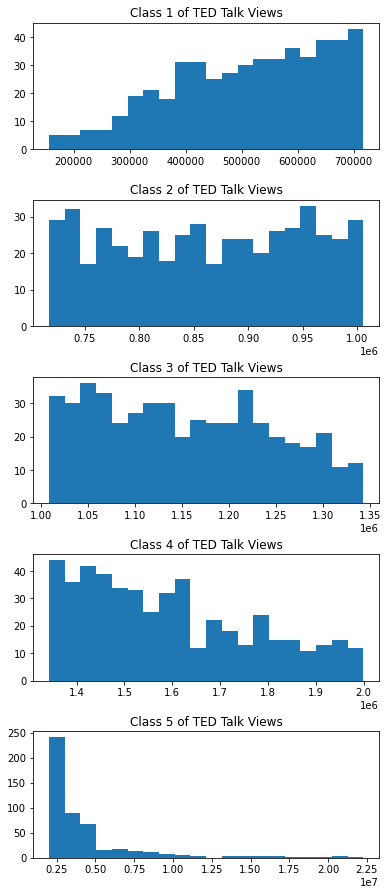

In [7]:
# Plot each of the histograms
fig, axs = plt.subplots(5)
for i in range(len(classes)):
    axs[i].set_title("Class " + str(i+1) + " of TED Talk Views")
    axs[i].hist(classes[i], bins = 20)

# Cosmetic adjustments
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Saving Data to CSV Files
Once we visualize each class, separate them to prepare for training!

In [8]:
class_size = int(len(views) / num_classes)
for i in range(num_classes):
    select_df = main_df[i * class_size:(i+1) * class_size]
    select_df.to_csv('data/dataset/' + str(i) + '.csv', index=None)